In [3]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

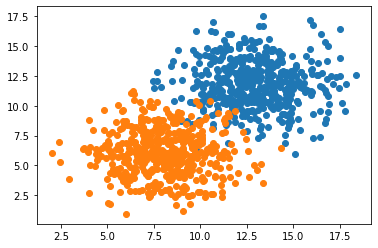

In [4]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [5]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,),activation='sigmoid'))
adam = Adam(lr=0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=50, shuffle='true')

Epoch 1/50
20/20 [==============================] - 0s 1ms/step - loss: 2.8531 - accuracy: 0.4810
Epoch 2/50
20/20 [==============================] - 0s 1ms/step - loss: 0.8084 - accuracy: 0.5940
Epoch 3/50
20/20 [==============================] - 0s 1ms/step - loss: 0.5986 - accuracy: 0.6730
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7390
Epoch 5/50
20/20 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.8040
Epoch 6/50
20/20 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8590
Epoch 7/50
20/20 [==============================] - 0s 1ms/step - loss: 0.3534 - accuracy: 0.9020
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.9260
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.9390
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.9470
Epoch 11/50
20/20 [

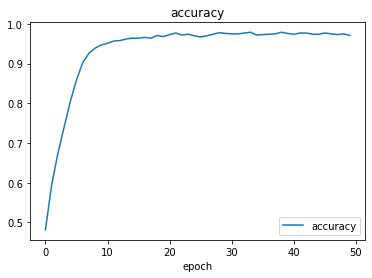

In [6]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

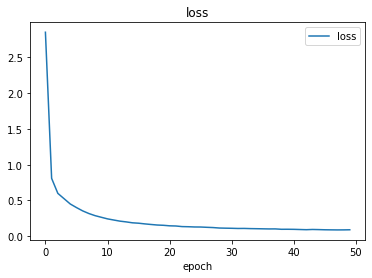

In [7]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [47]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx,yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

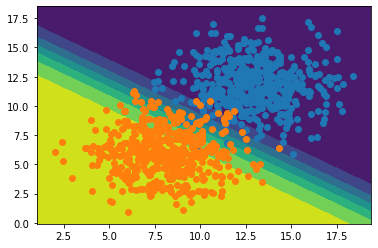

In [48]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])